In [2]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv('codes.csv')

In [4]:
print(tf.config.list_physical_devices('GPU'))

[]


In [18]:
df['code_array'] = df['code'].apply(lambda x: np.array([int(digit) for digit in x]).reshape(29, 29))
df['code_oned'] = df['code'].apply(lambda x: np.array([int(digit) for digit in x]))

In [22]:
# Function to split DFT into real and imaginary parts and reshape them
def split_dft(dft_str):
    complex_numbers = [complex(c.strip()) for c in dft_str.strip('()').split(')(')]
    real_part = np.array([c.real for c in complex_numbers])
    imag_part = np.array([c.imag for c in complex_numbers])
    return real_part, imag_part

# Apply the function to each row
df['dft_real'], df['dft_imag'] = zip(*df['dft'].apply(split_dft))


In [28]:
def combine_dft(dft_str):
    complex_numbers = [complex(c.strip()) for c in dft_str.strip('()').split(')(')]
    real_part = np.array([c.real for c in complex_numbers])
    imag_part = np.array([c.imag for c in complex_numbers])
    return np.append(real_part, imag_part)

df['dft_stacked'] = df['dft'].apply(combine_dft)

In [23]:
df['dft_real'][1]

array([ 4.34000000e+02,  1.08071834e+01,  1.16538698e+01, -1.64795320e+00,
       -1.87303176e+01,  1.17371224e+01,  1.15916140e+01, -4.35502911e+00,
        5.63752510e+00,  2.64323578e+01,  1.68520094e+01,  3.09578076e+00,
       -7.72296602e+00,  1.24799811e+01, -4.83117788e+00, -4.83117788e+00,
        1.24799811e+01, -7.72296602e+00,  3.09578076e+00,  1.68520094e+01,
        2.64323578e+01,  5.63752510e+00, -4.35502911e+00,  1.15916140e+01,
        1.17371224e+01, -1.87303176e+01, -1.64795320e+00,  1.16538698e+01,
        1.08071834e+01,  1.51266653e+01, -6.60328929e+00,  1.77076427e+01,
        2.23947665e+00, -1.19043913e+01,  1.83703987e+01,  8.43149344e+00,
       -5.83005577e+00,  5.20465617e+00,  1.04787234e+01,  1.85593166e+01,
       -9.95578466e+00,  1.41314030e+01,  1.03534517e+00,  1.33139971e+01,
       -5.22756993e-01,  2.36421661e+01, -2.35321370e+01,  1.94158717e+01,
        4.16280879e-01,  8.77439181e+00, -1.04716647e+01,  7.49013067e+00,
        1.35997745e+01, -

In [29]:
df['dft_input'] = df.apply(lambda row: np.stack([row['dft_real'], row['dft_imag']], axis=-1), axis=1)
df

,message,ecl,code,dft,code_array,dft_real,dft_imag,dft_input,code_oned,dft_stacked
0,L6u8zQ9VVyRpe1ei,low,1111111010111000101010111111110000010100011111...,(427+0j)(-2.8175175992365857+0.630136458416135...,"[[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,...","[427.0, -2.8175175992365857, 0.243744204018344...","[0.0, 0.6301364584161351, -3.377233904834957, ...","[[427.0, 0.0], [-2.8175175992365857, 0.6301364...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...","[427.0, -2.8175175992365857, 0.243744204018344..."
1,ubVbNkU06pbE3h9g,low,1111111001011101011100111111110000010011001001...,(434+0j)(10.807183385519064+1.6833271499847076...,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,...","[434.0, 10.807183385519064, 11.653869834497211...","[0.0, 1.6833271499847076, 3.590573944887191, -...","[[434.0, 0.0], [10.807183385519064, 1.68332714...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, ...","[434.0, 10.807183385519064, 11.653869834497211..."
2,GpJvyoYOIBAUcZci,low,1111111001100101001100111111110000010110000101...,(421+0j)(18.38198733763481+17.144012316302142j...,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,...","[421.0, 18.38198733763481, -0.5661845959123597...","[0.0, 17.144012316302142, -14.719108632479228,...","[[421.0, 0.0], [18.38198733763481, 17.14401231...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, ...","[421.0, 18.38198733763481, -0.5661845959123597..."
3,cAy894N3TREXHYny,low,1111111011111011001010111111110000010110111010...,(421+0j)(13.658458073800253-4.292253977778677j...,"[[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,...","[421.0, 13.658458073800253, 3.4794610948098184...","[0.0, -4.292253977778677, 1.9017941394007118, ...","[[421.0, 0.0], [13.658458073800253, -4.2922539...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, ...","[421.0, 13.658458073800253, 3.4794610948098184..."
4,Y9QWPw3kVJ54qYGi,low,1111111000100100011100111111110000010001011000...,(426+0j)(18.19212694171594+15.853104550344831j...,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,...","[426.0, 18.19212694171594, 13.923563405825028,...","[0.0, 15.853104550344831, 4.641599386757024, -...","[[426.0, 0.0], [18.19212694171594, 15.85310455...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[426.0, 18.19212694171594, 13.923563405825028,..."
...,...,...,...,...,...,...,...,...,...,...
9995,94DWZoFGjCNowfR4,high,1111111000110111101100111111110000010100010110...,(450+0j)(8.257060507058853+9.200290424336687j)...,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,...","[450.0, 8.257060507058853, 14.697255609275828,...","[0.0, 9.200290424336687, -2.3376961337253066, ...","[[450.0, 0.0], [8.257060507058853, 9.200290424...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, ...","[450.0, 8.257060507058853, 14.697255609275828,..."
9996,3IrYtxrZJmH0i2FZ,high,1111111010100111111010111111110000010111101101...,(427+0j)(10.192978277902142-0.7574290995907544...,"[[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,...","[427.0, 10.192978277902142, 0.7191817720785676...","[0.0, -0.7574290995907544, -1.404129281321833,...","[[427.0, 0.0], [10.192978277902142, -0.7574290...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, ...","[427.0, 10.192978277902142, 0.7191817720785676..."
9997,oSNCYIRkaNNmbZUg,high,1111111011101111111000111111110000010001011001...,(424+0j)(5.277871549246948+0.8825334813142476j...,"[[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,...","[424.0, 5.277871549246948, 19.842957522683097,...","[0.0, 0.8825334813142476, -3.8360751725949624,...","[[424.0, 0.0], [5.277871549246948, 0.882533481...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ...","[424.0, 5.277871549246948, 19.842957522683097,..."
9998,suU6R44rjUsWjAk2,high,1111111001100110001010111111110000010010100101...,(432+0j)(0.14421166243200112-3.16432783955714j...,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,...","[432.0, 0.14421166243200112, 11.06995601660646...","[0.0, -3.16432783955714, 5.160625149229531, -1...","[[432.0, 0.0], [0.14421166243200112, -3.164327...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [30]:
# Features (X) - DFT components
X = np.stack(df['dft_stacked'].values)  # Shape: (num_samples, 29, 29, 2)

# Labels (y) - QR codes
y = np.stack(df['code_oned'].values)  # Shape: (num_samples, 29, 29)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# X_tr, X_te = split_data(df[']dfts, 0.8, 12345)
# y_tr, y_te = split_data(codes, 0.8, 12345)

NameError: name 'dfts' is not defined

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(29, 29, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(29 * 29 * 64, activation='relu'),  # Adjusting to match the target shape
    layers.Reshape((29, 29, 64)),
    layers.Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')  # Output should match the shape of QR code (29x29)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [60]:
model = tf.keras.Sequential()

# Add the input layer (implicitly defined by the first layer)
model.add(tf.keras.layers.InputLayer(input_shape=(1682,)))

# Add the output layer with Y units (no activation for regression, 'softmax' or 'sigmoid' for classification)
model.add(tf.keras.layers.Dense(841))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# Compile the model (use appropriate loss and metrics for your task)
model.compile(optimizer=optimizer, loss='mse')  # or 'categorical_crossentropy' for classification

In [32]:
# model = Sequential([Dense(29*29*2, input_dim=29*29*2, use_bias=False)])
# model.compile(loss='mean_squared_error', optimizer='adam', )

In [39]:
# Ensure the inputs and labels are numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train.shape

(8000, 841)

In [36]:
# Convert to the correct data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [17]:
for set in [X_train, X_test, y_train, y_test]:
    for i in range(len(set)):
        set[i] = set[i].flatten()

ValueError: could not broadcast input array from shape (1682,) into shape (29,29,2)

In [61]:
# Train the model
model.fit(X_train, y_train, epochs=100, validation_data=[X_test[1000:], y_test[1000:]])

Epoch 1/100
250/250 [==============================] - 2s 8ms/step - loss: 73.0626 - val_loss: 60.6351
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 52.8446 - val_loss: 47.1922
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 40.7356 - val_loss: 37.0490
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 31.6541 - val_loss: 29.2560
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 24.7222 - val_loss: 23.2983
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 19.3948 - val_loss: 18.5223
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 15.2810 - val_loss: 14.8130
Epoch 8/100
250/250 [==============================] - 2s 7ms/step - loss: 12.0896 - val_loss: 11.8905
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 9.6064 - val_loss: 9.6015
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, num_samples=1000):
    """
    Evaluates the trained CNN model on the test set and displays a few samples with their predictions.

    Parameters:
    - model: The trained TensorFlow/Keras model.
    - X_test: The input features for the test set (shape: num_samples, 29, 29, 2).
    - y_test: The true labels for the test set (shape: num_samples, 29, 29).
    - num_samples: The number of test samples to display.

    Returns:
    - accuracy: The overall accuracy of the model on the test set.
    """
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Binarize the predictions (0 or 1)
    predictions_binarized = (predictions > 0.5).astype(np.int32).reshape(predictions.shape[0], 29, 29)

    # Calculate accuracy
    correct_predictions = np.sum(predictions_binarized == y_test)
    total_pixels = y_test.size
    accuracy = correct_predictions / total_pixels
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Display some predictions
    for i in range(num_samples):
        plt.figure(figsize=(12, 4))

        # Original QR code
        plt.subplot(1, 3, 1)
        plt.title("Original QR Code")
        plt.imshow(y_test[i], cmap='gray')

        # Predicted QR code
        plt.subplot(1, 3, 2)
        plt.title("Predicted QR Code")
        plt.imshow(predictions_binarized[i], cmap='gray')

        # Difference (Error)
        plt.subplot(1, 3, 3)
        plt.title("Difference (Error)")
        plt.imshow(y_test[i] - predictions_binarized[i], cmap='gray')

        plt.show()
    
    return accuracy




In [1]:
evaluate_model(model, X_test[:999], y_test[:999])

NameError: name 'evaluate_model' is not defined

32/32 [==============================] - 0s 5ms/step
Test Accuracy: 100.00%


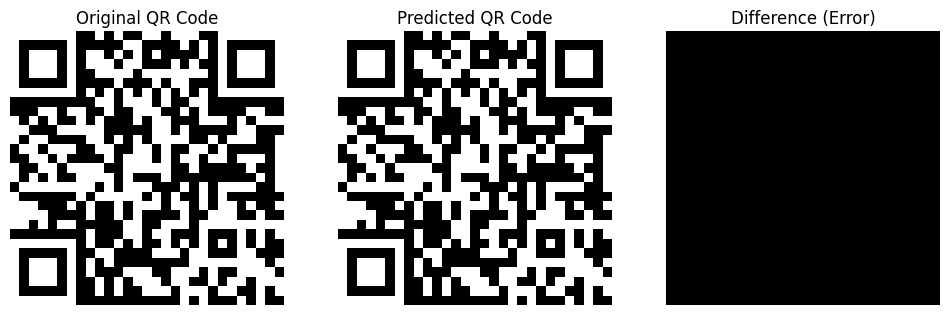

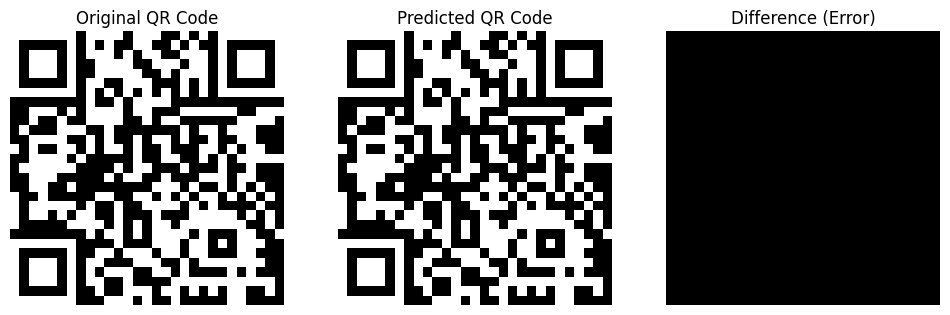

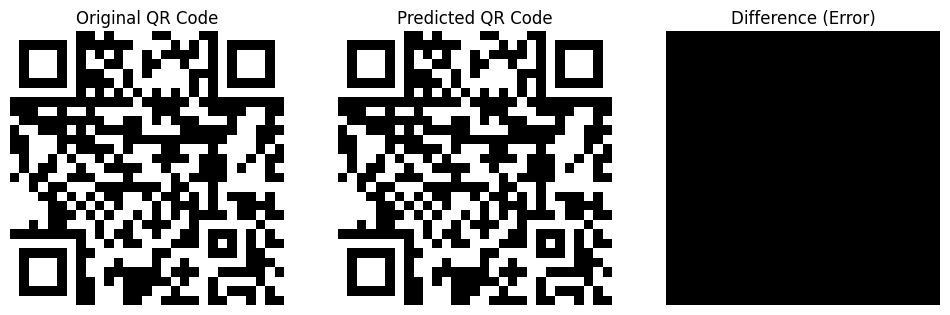

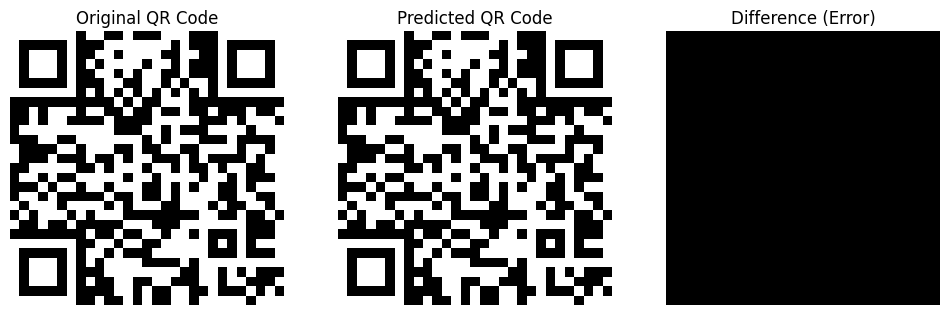

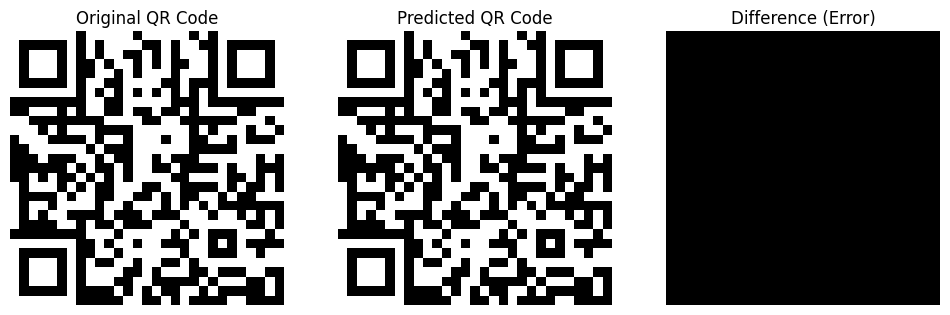

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, num_samples=5):
    """
    Evaluates the trained model on the test set and displays a few samples with their predictions.

    Parameters:
    - model: The trained TensorFlow/Keras model.
    - X_test: The input features for the test set (shape: (num_samples, 1682)).
    - y_test: The true labels for the test set (shape: (num_samples, 841)).
    - num_samples: The number of test samples to display.

    Returns:
    - accuracy: The overall accuracy of the model on the test set.
    """
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Binarize the predictions (0 or 1)
    predictions_binarized = (predictions > 0.5).astype(np.int32)
    
    # Calculate accuracy
    correct_predictions = np.sum(predictions_binarized == y_test)
    total_elements = y_test.size
    accuracy = correct_predictions / total_elements
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Display some predictions
    for i in range(num_samples):
        plt.figure(figsize=(12, 4))

        # Original QR code
        plt.subplot(1, 3, 1)
        plt.title("Original QR Code")
        plt.imshow(y_test[i].reshape(29, 29), cmap='gray')
        plt.axis('off')

        # Predicted QR code
        plt.subplot(1, 3, 2)
        plt.title("Predicted QR Code")
        plt.imshow(predictions_binarized[i].reshape(29, 29), cmap='gray')
        plt.axis('off')

        # Difference (Error)
        plt.subplot(1, 3, 3)
        plt.title("Difference (Error)")
        plt.imshow(y_test[i].reshape(29, 29) - predictions_binarized[i].reshape(29, 29), cmap='gray')
        plt.axis('off')

        plt.show()
        
    return accuracy

# Example usage:
accuracy = evaluate_model(model, X_test[:999], y_test[:999], num_samples=5)
